<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Yassaee</h4>
<h4 align="center">Sharif University of Technology, Autumn 2024</h4>

**Student Name**: Arian Bastani

**Student ID**: 400100073

# Logistic Regression

Logistic regression is a **supervised machine learning algorithm** primarily used for **binary classification tasks**. It predicts the probability of an outcome belonging to one of two classes (0 or 1) using a logistic function, specifically the **sigmoid function**, which maps any real-valued number into the range [0, 1].

### Key Features:
- **Binary Outcomes**: Logistic regression is suitable when the dependent variable is binary, such as yes/no or pass/fail.
- **Maximum Likelihood Estimation (MLE)**: Coefficients are estimated using MLE to maximize the likelihood of the observed data.
- **Interpretation**: The output can be interpreted as odds ratios, indicating how changes in independent variables affect the likelihood of an event.

### Types:
1. **Binary Logistic Regression**: Two possible outcomes.
2. **Multinomial Logistic Regression**: More than two categories.
3. **Ordinal Logistic Regression**: Ordered categories.

Logistic regression is widely used in fields like finance, healthcare, and social sciences for tasks such as risk assessment and disease diagnosis.

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [1]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Using GPU.")
else:
    device = torch.device('cpu')
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


In [2]:
# import necessary libraries
import numpy as np

class MyLogisticRegression:
    # TODO: Initialize the class with necessary attributes, such as learning rate, number of iterations, and parameters (weights and bias).
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias = None
        self.weights = None

    # TODO: Implement a loss function for logistic regression, using binary cross-entropy as the loss metric.
    def loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # TODO: Implement the fit method to train the model. Use gradient descent to update the weights and bias based on the training data.
    # Ensure that the code is optimized to run on GPU if available (e.g., by using torch tensors on GPU).
    def fit(self, X, y):
        if self.weights == None: self.weights = np.zeros(X.shape[1])
        if self.bias == None: self.bias = 0

        for _ in range(self.num_iterations):
            z = self.bias + X @ self.weights
            y_pred = 1 / (1 + np.exp(-z))
            gradient = np.mean((y_pred - y) @ X)

            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * np.mean((y_pred - y))




    # TODO: Implement the predict function that uses the learned weights and bias to output predictions on new data.
    # Apply a sigmoid function and set a threshold (e.g., 0.5) to determine the binary outcome.
    def predict(self, X):
        z = self.bias + X @ self.weights
        y_pred = 1 / (1 + np.exp(-z))
        y_pred = np.where(y_pred > 0.5, 1, 0)
        return y_pred

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# TODO: Load the dataset from Logistic_question.csv.
# Make sure to import necessary libraries for loading and handling CSV data (e.g., pandas, numpy).
df = pd.read_csv('/content/Logistic_question.csv')

# TODO: Make the 'Target' column binary if necessary.
# For example, you could map specific values to 0 and 1 based on conditions.
df['Target'] = df['Target'].where(df['Target'] > 0.5, 0)
df['Target'] = df['Target'].where(df['Target'] <= 0.5, 1)

# TODO: Split the data into features (X) and target (y).
# Then, split the data into training and testing sets with an 80-20 split.
X = df.drop('Target', axis=1).values
y = df['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Normalize the training data (X_train) and use the same scaling parameters to normalize X_test.
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# TODO: Create an instance of MyLogisticRegression.
# Fit the model on the training set (X_train, y_train).
my_model = MyLogisticRegression()
my_model.fit(X_train, y_train)

# TODO: Predict the target values on the test set (X_test).
y_pred = my_model.predict(X_test)

# TODO: Calculate and print 4 different evaluation metrics on the test set predictions.
# Suggested metrics: accuracy, precision, recall, and F1-score.
# You may want to import these metrics from sklearn (e.g., accuracy_score, precision_score, recall_score, f1_score).
print(f'Accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'Percision: {precision_score(y_test, y_pred)}')
print(f'Recall:    {recall_score(y_test, y_pred)}')
print(f'F1:        {f1_score(y_test, y_pred)}')

Accuracy:  0.875
Percision: 0.875
Recall:    1.0
F1:        0.9333333333333333


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

# *Accuracy*
Accuracy is a good overall measure when the classes are balanced

$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

# *Precision*
Precision is usefull when the cost of false positives is high

$ \text{Percision} = \frac{TP}{TP + FP} $

# *Recall*
Recall is important when the cost of false negatives is high.

$ \text{Recall} = \frac{TP}{TP + FN} $

# *F1*
The F1-score is a good choice when you need to balance precision and recall, especially when dealing with imbalanced datasets

$ \text{F1} = 2 \cdot \frac{\text{Percision} \,\cdot\, \text{Recall}}{\text{Percision} \, + \, \text{Recall}} $



**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [ ]:
# TODO: Create an instance of LogisticRegression from scikit-learn.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# TODO: Fit the built-in Logistic Regression model on the training set (X_train, y_train).
model.fit(X_train, y_train)

# TODO: Use the trained model to predict on the test set (X_test).
y_pred_sk = model.predict(X_test)

# TODO: Calculate and print the same evaluation metrics as before (e.g., accuracy, precision, recall, F1-score)
# to compare the performance of the custom model with the built-in Logistic Regression.
print(f'Accuracy:  {accuracy_score(y_test, y_pred_sk)}')
print(f'Percision: {precision_score(y_test, y_pred_sk)}')
print(f'Recall:    {recall_score(y_test, y_pred_sk)}')
print(f'F1:        {f1_score(y_test, y_pred_sk)}')

Accuracy:  0.875
Percision: 0.875
Recall:    1.0
F1:        0.9333333333333333


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

# *Performance*
Both models performed the same in terms of the calculated metrics. They both achieved Recall of 1, meaning they identified all positives. However model's percision is lower indicating that there are some false positives.

# *Parameters*
- *penality* : specify the regularization term
- *solver* : Algorithm to use in the optimization problem. For small datasets, `liblinear` is a good choice, whereas `sag` and `saga` are faster for large ones
- *C* : Inverse of regularization strength
- *random state* : By setting a specific random_state value, you guarantee that the same random numbers will be generated each time you run the code


# Multinomial Logistic Regression

Multinomial logistic regression is a statistical method used for **classifying outcomes** when the dependent variable has **more than two categories**. Unlike binary logistic regression, which handles only two possible outcomes, multinomial logistic regression can predict the probabilities of multiple discrete outcomes based on one or more independent variables, which can be continuous or categorical.

### Key Features:
- **Generalization of Logistic Regression**: It extends the binary logistic model to handle multiclass problems, making it suitable for scenarios like predicting consumer preferences or classifying types of jobs.
- **Probability Estimation**: The model estimates the probability of each category by calculating a score for each potential outcome and applying the softmax function to convert these scores into probabilities.
- **Modeling Approach**: It can be conceptualized as running multiple binary logistic regressions, where one category is treated as a reference (or pivot) against which others are compared.

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [2]:
import numpy as np

class MyMultinomialLogisticRegression:
    # TODO: Initialize the class with necessary attributes, such as learning rate, number of iterations, and parameters (weights and bias).
    # Remember that, for multinomial logistic regression, weights will be a matrix with shape (n_features, n_classes).
    def __init__(self, learning_rate=0.01, num_iterations=1000, n_classes=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias = None
        self.weights = None

    # TODO: Implement a loss function for multinomial logistic regression, using categorical cross-entropy as the loss metric.
    # This will calculate the average log loss across all classes for a given set of predictions.
    def loss(self, y_true, y_pred):
        m = y_true.shape[0]
        m = y_true.shape[0]
        cost = -np.sum(y_true * np.log(y_pred)) / m
        return cost

    # TODO: Implement the fit method to train the model. Use gradient descent to update the weights and bias based on the training data.
    # Ensure that the code is optimized to run on GPU if available (e.g., by using torch tensors on GPU).
    def fit(self, X, y):
        if self.weights == None: self.weights = np.zeros((X.shape[1], y.shape[1]))
        if self.bias == None: self.bias = np.zeros(y.shape[1])
        m = X.shape[0]

        for k in range(self.num_iterations):
          exp = np.exp(X @ self.weights + self.bias)
          s = exp / np.sum(exp, axis=1, keepdims=True)

          gradient = X.T @ (s - y) / m

          db = np.mean(s - y)

          self.weights -= self.learning_rate * gradient

          self.bias -= self.learning_rate * db

    # TODO: Implement the predict function that uses the learned weights and bias to output predictions on new data.
    # Use the softmax function to generate probabilities for each class, and assign each sample to the class with the highest probability.
    def predict(self, X):
        exp = np.exp(X @ self.weights + self.bias)
        s = exp / np.sum(exp, axis=1, keepdims=True)
        return np.argmax(s, axis=1)

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [ ]:
# TODO: Load the dataset.
# Make sure to import necessary libraries for handling CSV data (e.g., pandas, numpy).
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Logistic_question.csv')

# TODO: Quantize the 'Target' column into `i` levels, where `i` ranges from 2 to 10.
# This means dividing the target values into `i` evenly spaced bins and assigning each value to a bin index (label).
a = []
p = []
r = []
f = []
for i in range(2, 11):

  # TODO: For each value of `i` (from 2 to 10):
  #       - Quantize the target column based on the current `i` value.
  #       - Split the data into features (X) and quantized target (y).
  #       - Split the data into training and testing sets with an 80-20 split.
  #       - Normalize the training data (X_train) and use the same scaling parameters to normalize X_test.
  X = df.drop('Target', axis=1).values

``y_ind = df['Target']
  y_ind = np.int_(y_ind*i)
  y = np.zeros((y_ind.shape[0], i))
  for j in range(i):
      y[:, j] = np.where(y_ind == j, 1, 0)


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # TODO: Create an instance of MyMultinomialLogisticRegression.
  # Fit the model on the training set (X_train, y_train).
  my_multi_model = MyMultinomialLogisticRegression(num_iterations=10000*i);
  my_multi_model.fit(X_train, y_train);

  # TODO: Predict the target values on the test set (X_test).
  y_pred = my_multi_model.predict(X_test);
  y_test_ind = np.argmax(y_test, axis=1)

  # TODO: Calculate and print 4 different evaluation metrics on the test set predictions.
  # Suggested metrics: accuracy, precision (macro-averaged), recall (macro-averaged), and F1-score (macro-averaged).
  # You may want to import these metrics from sklearn (e.g., accuracy_score, precision_score, recall_score, f1_score).
  a.append(accuracy_score(y_test_ind, y_pred))
  p.append(precision_score(y_test_ind, y_pred, average="macro"))
  r.append(recall_score(y_test_ind, y_pred, average="macro"))
  f.append(f1_score(y_test_ind, y_pred, average="macro"))

  print(f'i: {i}')
  print(f'Accuracy:  {accuracy_score(y_test_ind, y_pred)}')
  print(f'Percision: {precision_score(y_test_ind, y_pred, average="macro")}')
  print(f'Recall:    {recall_score(y_test_ind, y_pred, average="macro")}')
  print(f'F1:        {f1_score(y_test_ind, y_pred, average="macro")} \n')

i: 2
Accuracy:  0.925
Percision: 0.9605263157894737
Recall:    0.7
F1:        0.7651663405088063 

i: 3
Accuracy:  0.85
Percision: 0.8351648351648351
Recall:    0.8351648351648351
F1:        0.8351648351648351 

i: 4
Accuracy:  0.8125
Percision: 0.8774509803921569
Recall:    0.666994266994267
F1:        0.6812235120692832 

i: 5
Accuracy:  0.6375
Percision: 0.4374561403508772
Recall:    0.453781512605042
F1:        0.43792580057049646 

i: 6
Accuracy:  0.6625
Percision: 0.7372255353754404
Recall:    0.644074074074074
F1:        0.6386696187909127 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


i: 7
Accuracy:  0.625
Percision: 0.4067619047619047
Recall:    0.4579710144927536
F1:        0.40969291577987227 

i: 8
Accuracy:  0.6
Percision: 0.5863123993558776
Recall:    0.4108024691358025
F1:        0.41198365771536505 

i: 9
Accuracy:  0.475
Percision: 0.6470057720057719
Recall:    0.44946311858076565
F1:        0.43499354005167956 

i: 10
Accuracy:  0.4375
Percision: 0.40148809523809526
Recall:    0.3517364840673111
F1:        0.30250874773142516 



**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**
Based on accuracy and precision, my model performed best for i=2. However, in terms of recall and F1-score, i=3 was the optimal number of classes.

Below, a visualization of the given metrics for different numbers of classes is presented.

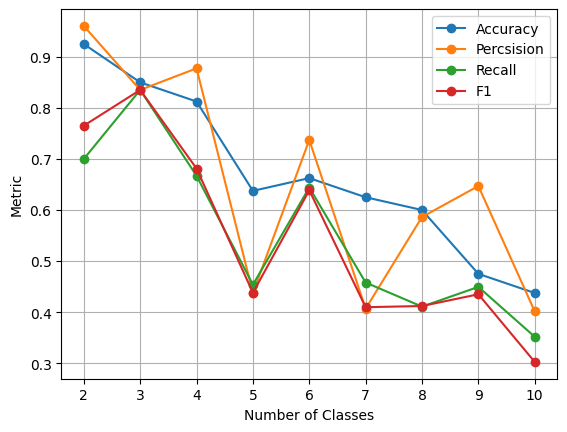

In [11]:
i = np.arange(2,11)
plt.plot(i, a, label='Accuracy', marker='o')
plt.plot(i, p, label='Percsision', marker='o')
plt.plot(i, r, label='Recall', marker='o')
plt.plot(i, f, label='F1', marker='o')
plt.xlabel('Number of Classes')
plt.ylabel('Metric')
plt.grid('on')
plt.legend()
plt.show()

# Going a little further!(bonus*)

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [5]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Then use this code to automatically download the dataset into Colab.

In [6]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 103MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [7]:
# TODO: Import the pandas library to handle data manipulation and analysis.
import pandas as pd

# TODO: Load the dataset into a pandas DataFrame.
df = pd.read_csv('/content/adult.csv')

# TODO: Check for null entries in each column using the .isnull().sum() method.
# This will give the number of null entries for each column.
columns_null = df.isnull().sum()

# TODO: Calculate the total number of null entries in the dataset by summing the null values across all columns.
total_null = columns_null.sum()

# TODO: Print the number of null entries per column and the total number of null entries in the dataset.
print(columns_null)
print('\ntotal             ', total_null)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

total              0


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**
# **1. Deletion**
We can remove entire rows or columns containing null values.

# **2. Constant Imputation**
We can replace null cells with a default value like 0.

# **3. Regression**
Using regression models to fill in the missing cells.

# **4. Interpolation**
Estimating the missing value with it's neighbors. for example we can use average of its first neighbors (linear interpolation)

# **5. Mean Imputation**
We can replace the null values with the column's average.

**Task:** Handle null entries using your best method.

Since there is no null cell in this dataset, we can skip this part

In [8]:

# TODO: Determine the best method for handling null entries.
# Options include:
# - Dropping rows with null values using .dropna() if they are few in number.
# - Filling null values with a specific value (e.g., mean, median, or mode) using .fillna().
# - Consider more sophisticated methods, such as interpolation or model-based imputation, if appropriate.
df.dropna(inplace = True)

# TODO: Implement the chosen method to handle null entries in the dataset.
# For example, if dropping rows, use:
# data_cleaned = data.dropna()

# TODO: If filling null values, decide on the strategy (mean, median, mode) for each relevant column.
# For example:
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)

# TODO: After handling null entries, verify that there are no more null values in the dataset.
# This can be done using the .isnull().sum() method again.
columns_null = df.isnull().sum()

# TODO: Print the results to confirm that null entries have been handled successfully.
print(columns_null)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [10]:
# TODO: Convert categorical features to numerical values using appropriate encoding methods.
# Options include one-hot encoding with pd.get_dummies() or label encoding using sklearn's LabelEncoder.
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# TODO: Split the dataset into features (X) and target (y).
# For example, set X to all columns except the target and y to the target column.
X = df.drop('income', axis=1).values
y = df['income'].values


# TODO: Use train_test_split from sklearn to split the dataset into training and testing sets with an 80-20 ratio.
# Set random_state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Normalize the features using a method such as StandardScaler or MinMaxScaler.
# Fit the scaler on X_train and transform both X_train and X_test.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TODO: Import the LogisticRegression model and GridSearchCV from sklearn.
# Create an instance of LogisticRegression and specify the parameters you want to tune.
model = LogisticRegression(max_iter=500)

# TODO: Define a parameter grid for GridSearchCV to search over.
# This should include hyperparameters such as 'C' (regularization strength), 'solver', etc.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']
}

# TODO: Fit the GridSearchCV to the training data (X_train, y_train).
# Ensure you specify the scoring metric you want to optimize (e.g., accuracy).
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# TODO: Retrieve the best model and its parameters from GridSearchCV.
# Print the best parameters found by GridSearchCV.
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# TODO: Evaluate the best model on the training set and the test set.
# Calculate and print the training and testing accuracy.
best_model.fit(X_train, y_train)
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

# TODO: Print the results to summarize the model performance.
print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Training accuracy: 0.824
Test accuracy: 0.827


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# TODO: Set the value of i to 10 for splitting the training data into parts.
i = 10

# TODO: Split X_train into i parts. You can use numpy's array_split function or similar methods.
# This will create a list of subsets of X_train and the corresponding subsets of y_train.
X_train_parts = np.array_split(X_train, i)
y_train_parts = np.array_split(y_train, i)

# TODO: Initialize a list to store the models trained on each part of the data.
models = []

# TODO: For each part (subset) of the training data:
#       - Create an instance of your custom MyLogisticRegression model.
#       - Fit the model on the subset (X_part, y_part).
#       - Store the trained model in the list of models.
for X_part, y_part in zip(X_train_parts, y_train_parts):
    model = MyLogisticRegression()
    model.fit(X_part, y_part)
    models.append(model)

# TODO: Define the three ensemble methods you want to implement.
def weighted_average(models, X, weights = None):
    if weights is None: weights = np.ones(len(models)) / len(models)

    y_pred = np.zeros(X.shape[0])
    for model, weight in zip(models, weights):
        y_pred += weight * model.predict(X)
    return np.round(y_pred)

def average(models, X):
    return weighted_average(models, X)

def majority_voting(models, X):
    y_pred = np.array([model.predict(X) for model in models])
    mean = np.mean(y_pred, axis=0)
    return np.where(mean > 0.5, 1, 0)

# TODO: Evaluate and compare the test accuracy of each ensemble method on X_test.
# Print the test accuracy for each ensemble method.
w = np.arange(10)
w = w / np.mean(w)
acc_weighted_average = accuracy_score(y_test, weighted_average(models, X_test, w))
acc_average = accuracy_score(y_test, average(models, X_test))
acc_majority_voting = accuracy_score(y_test, majority_voting(models, X_test))

print(f'Weighted Average: {acc_weighted_average}')
print(f'Average: {acc_average}')
print(f'Majority Voting: {acc_majority_voting}')

# TODO: Based on the results, determine which ensemble method performed the best on the test set.
print('Average and majority voting are the better methods')

Weighted Average: 0.5374142696284164
Average: 0.689016275975023
Majority Voting: 0.689016275975023
Average and majority voting are the better methods


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**
Here, since we have only two classes, majority voting and averaging are the same.

In the average method, we predict using each model and then average the results. We round the final result to 0 or 1.

Weighted average is similar, but it assigns different weights to the predictions of each model.

Majority voting chooses the class with the highest number of repetitions.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [15]:
# TODO: Initialize lists to store the values of i, training accuracies, and testing accuracies.
train_accuracies = []
test_accuracies = []

# TODO: Create a loop to iterate over the range of i from 2 to 100:
for i in range(2, 101):
  X_parts = np.array_split(X_train, i)
  y_parts = np.array_split(y_train, i)
  models = []

  for X_part, y_part in zip(X_parts, y_parts):
    model = MyLogisticRegression()
    model.fit(X_part, y_part)
    models.append(model)

  test_acc = accuracy_score(y_test, majority_voting(models, X_test))
  train_acc = accuracy_score(y_train, majority_voting(models, X_train))
  print(f'i = {i:3d}: test accuracy = {test_acc:.4f}')

  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)

i =   2: test accuracy = 0.6115
i =   3: test accuracy = 0.6195
i =   4: test accuracy = 0.6325
i =   5: test accuracy = 0.6393
i =   6: test accuracy = 0.6470
i =   7: test accuracy = 0.6542
i =   8: test accuracy = 0.6641
i =   9: test accuracy = 0.6785
i =  10: test accuracy = 0.6890
i =  11: test accuracy = 0.6995
i =  12: test accuracy = 0.7045
i =  13: test accuracy = 0.7744
i =  14: test accuracy = 0.7566
i =  15: test accuracy = 0.7729
i =  16: test accuracy = 0.7721
i =  17: test accuracy = 0.7747
i =  18: test accuracy = 0.7656
i =  19: test accuracy = 0.7426
i =  20: test accuracy = 0.7656
i =  21: test accuracy = 0.7656
i =  22: test accuracy = 0.7656
i =  23: test accuracy = 0.7656
i =  24: test accuracy = 0.7656
i =  25: test accuracy = 0.7656
i =  26: test accuracy = 0.7656
i =  27: test accuracy = 0.7661
i =  28: test accuracy = 0.7687
i =  29: test accuracy = 0.7733
i =  30: test accuracy = 0.7753
i =  31: test accuracy = 0.7754
i =  32: test accuracy = 0.7749
i =  33:

The best value of i is 52
Training accuracy: 0.7722980062959076
Test accuracy: 0.7760262053434334


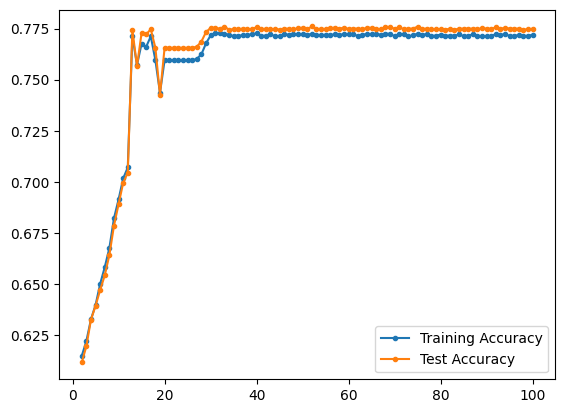

In [17]:
import matplotlib.pyplot as plt
# TODO: After the loop, determine the best value of i based on the test accuracy.
ind = np.argmax(test_accuracies)
# TODO: Print the best value of i, along with the corresponding training and test accuracy of the best model.
print(f'The best value of i is {ind+2}')
print(f'Training accuracy: {train_accuracies[ind]}')
print(f'Test accuracy: {test_accuracies[ind]}')

# TODO: Plot the training and testing accuracies against i.
# Use a line plot to visualize the performance as i changes from 2 to 100.
# Make sure to label the axes and provide a title for the plot.
plt.plot(np.arange(2, 101), train_accuracies, label='Training Accuracy', marker='.')
plt.plot(np.arange(2, 101), test_accuracies, label='Test Accuracy', marker='.')
plt.legend()
plt.show()

**Question:** Analyze the results.

**Your Answer:**
Increasing `i` results to a higher accuracy on both train and test data.

The test accuracy is mostly higher than the train accuracy, which suggests that our model generalizes well to unseen data.